In [1]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py
from yt.fields.api import ValidateParameter
import pandas as pd

In [2]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
ds = yt.load('../data/snapshot_150.hdf5', unit_base=unit_base)
ds

yt : [INFO     ] 2024-02-23 13:23:29,964 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-02-23 13:23:29,986 Parameters: current_time              = 0.00012483821354781577
yt : [INFO     ] 2024-02-23 13:23:29,986 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-23 13:23:29,987 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-23 13:23:29,987 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-02-23 13:23:29,987 Parameters: cosmological_simulation   = 0


GizmoDataset: /Users/alexanderescamilla/research/data/snapshot_150.hdf5

In [6]:
ds.field_list

[('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'EddingtonTensor'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'HII'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'MagneticField'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'Metallicity_11'),
 ('PartType0', 'Metallicity_12'),
 ('PartType0', 'Metallicity_13'),
 ('PartType0', 'MolecularMassFraction'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 ('PartType0', 'ParticleChildIDsNumber'),
 ('PartType0', 'ParticleIDGenerationNumber'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'PhotonEnergy'),
 ('PartType0', 'Potential'),
 ('PartType0'

In [18]:
#phase plot com vs radial velocity

In [19]:
# define the sphere using yt first
sp = ds.sphere([0,0,0], (4, "pc"))

yt : [INFO     ] 2024-02-22 12:08:45,359 Allocating for 1.214e+07 particles
Loading particle index: 100%|█████████████████| 47/47 [00:00<00:00, 2833.70it/s]


In [20]:
# define com
CoM = (sp.quantities.center_of_mass()* u.cm).to(u.pc)

(f' The COM is {CoM}')

' The COM is [4.07977682 4.0808035  4.07863818] pc'


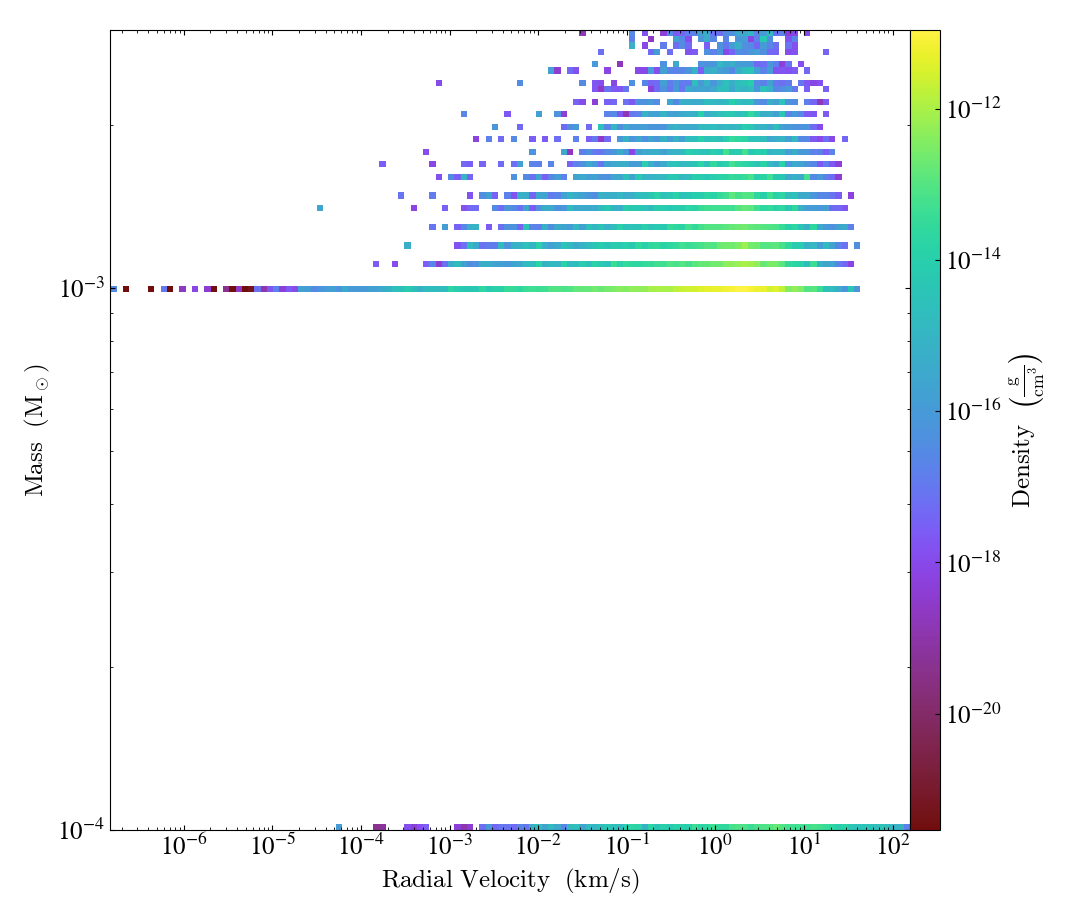

In [21]:
# Phase Plots ( weighted and nonweighted)
plot = yt.PhasePlot(
    ds, 
    ('gas', 'radial_velocity'),
     ("gas", 'mass'), 
    ('gas', 'density'), weight_field=None,
    )
plot.set_unit(("gas", "radial_velocity"), "km/s")
plot.set_unit(("gas", "mass"), "Msun")
plot.set_unit(("gas", "density"), "g/cm**3")
plot



In [22]:
#ds.derived_field_list

In [10]:
rho = ds.r["PartType0", "ParticleIDs"]
cr = ds.cut_region(sp, ["obj[('PartType0', 'ParticleIDs')] < 1e2"])
cr

YTCutRegion (snapshot_200): , base_object=YTSphere (snapshot_200): , center=[0. 0. 0.] cm, radius=1.2342710323849298e+19 cm, conditionals=["obj[('PartType0', 'ParticleIDs')] < 1e2"]

yt : [INFO     ] 2024-02-23 13:43:14,856 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:14,857 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:14,859 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:14,860 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:14,861 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800
yt : [INFO     ] 2024-02-23 13:43:21,870 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800



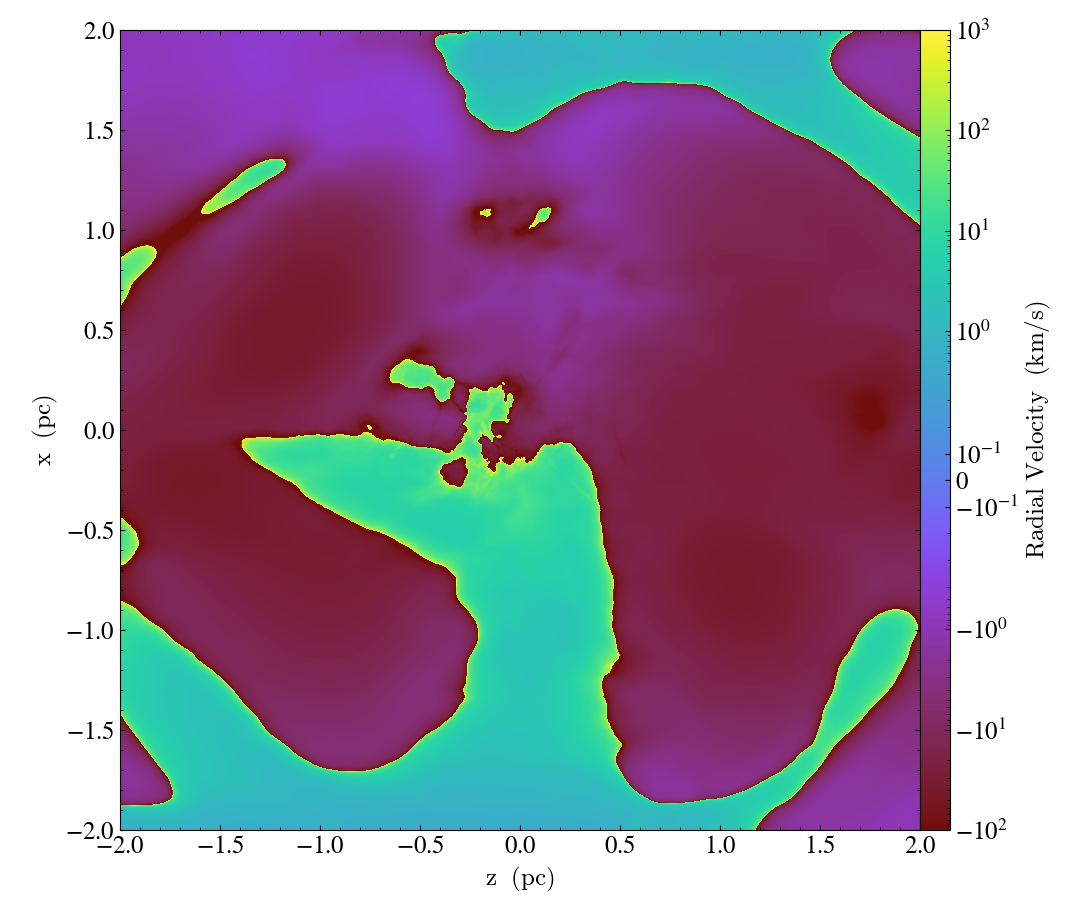

yt : [INFO     ] 2024-02-23 13:43:29,149 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:29,149 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:29,150 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:29,150 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-23 13:43:29,151 Making a fixed resolution buffer of (('gas', 'mass')) 800 by 800
yt : [INFO     ] 2024-02-23 13:43:34,677 Making a fixed resolution buffer of (('gas', 'mass')) 800 by 800


KeyError: ('gas', 'radial_velocity')

In [10]:
#for loop for projection plots

pwidth = (4.0,'pc')
projUnit = ["km/s", "Msun", "g/cm**3"]
weightField = [('gas','radial_velocity'), ("gas", "mass"), ("gas", "density")]
#'Msun/pc**2'
proFields = [("gas", "radial_velocity"), ("gas", "mass"), ("gas", 'density')]

for i, field in enumerate(proFields):
    p = yt.ProjectionPlot(ds, "y", field, width = pwidth, weight_field = weightField[i])
    p.set_zlim(("gas", "radial_velocity"), zmin=(-1e2, "km/s"), zmax=(1e3, "km/s"))
    p.set_unit(field, projUnit[i])
    
    #p.annotate_particles(pwidth)
    p.show()

In [19]:
#particle plots

yt : [INFO     ] 2024-02-21 19:06:42,908 xlim = 3.080000 5.080000
yt : [INFO     ] 2024-02-21 19:06:42,910 ylim = 3.080000 5.080000
yt : [INFO     ] 2024-02-21 19:06:42,918 xlim = 3.080000 5.080000
yt : [INFO     ] 2024-02-21 19:06:42,919 ylim = 3.080000 5.080000
yt : [INFO     ] 2024-02-21 19:06:42,927 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



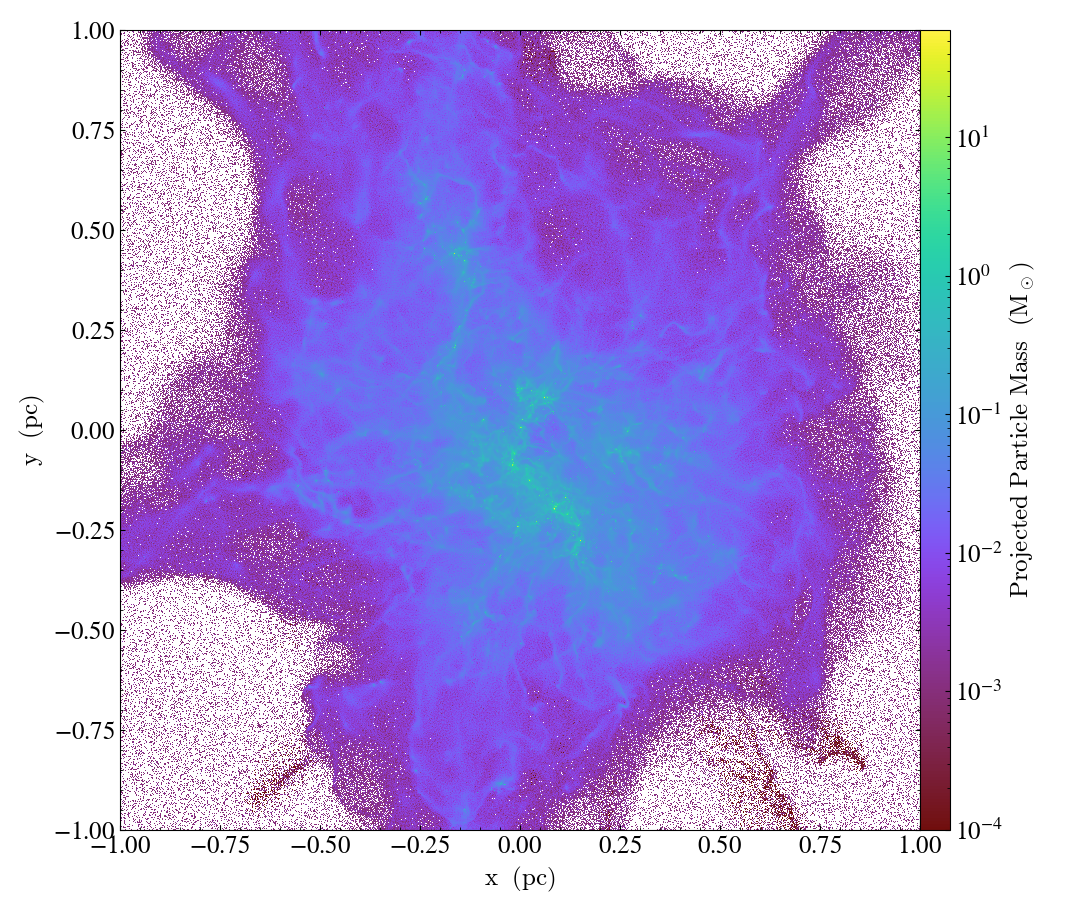

In [33]:
p = yt.ParticlePlot(
    ds,
    ("all", "particle_position_x"),
    ("all", "particle_position_y"),
    ("all", "particle_mass"),
    width=(2, 2),
)


p.set_axes_unit("pc")
p.set_unit(("all", "particle_mass"), "Msun")

In [31]:
#ds.derived_field_list